In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('df.csv')
df

,DATE,DelinquencyRate,GDPC1,Wage,DFF,UNRATE,new,Homes_Sold,Prices
0,2000-09-30,2.09,13183.890,611.0,6.519457,4.000000,4.166667,301.666667,105.786000
1,2000-12-31,2.23,13262.250,614.0,6.474891,3.900000,3.933333,301.333333,108.274667
2,2001-03-31,2.34,13219.251,620.0,5.597000,4.233333,3.766667,294.666667,110.484667
3,2001-06-30,2.41,13301.394,624.0,4.326703,4.400000,4.033333,296.666667,112.203333
4,2001-09-30,2.19,13248.142,636.0,3.501522,4.833333,4.333333,307.666667,114.156000
...,...,...,...,...,...,...,...,...,...
83,2021-06-30,2.48,19368.310,1048.0,0.068242,5.900000,5.300000,331.000000,254.633000
84,2021-09-30,2.31,19478.893,1068.0,0.090000,5.100000,6.200000,370.333333,266.878333
85,2021-12-31,2.28,19806.290,1069.0,0.079457,4.233333,6.233333,388.666667,276.591000
86,2022-03-31,2.09,19727.918,1100.0,0.121444,3.800000,6.233333,400.333333,290.544667


In [4]:
X = df.drop(['DATE', 'Prices'], axis = 1)
y = df['Prices']

In [5]:
scaler = StandardScaler()

In [6]:
x = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle= False)

In [8]:
model = LinearRegression()

In [9]:
model.fit(X_train, y_train)

LinearRegression()

In [10]:
preds = model.predict(X_test)

In [50]:
print('MSE = ',mean_squared_error(preds,y_test))

MSE =  224.81351111013427


In [52]:
print("Training Accuracy = ", model.score(X_train,y_train))

Training Accuracy =  0.9822847373595571


In [53]:
print("Test Accuracy = ",model.score(X_test,y_test))

Test Accuracy =  0.8196908416186084


In [36]:
dff = pd.DataFrame(data = y_test, columns= ['Prices'] )

In [37]:
dff['predicted'] = preds
dff

,Prices,predicted
58,169.204333,169.282195
59,170.881000,171.341526
60,172.973000,172.872925
61,175.700667,175.788622
62,177.720667,179.068821
63,179.439000,181.569342
64,181.851000,183.823257
65,184.727000,186.660145
66,187.379333,190.018725
67,189.682333,192.716080


<AxesSubplot:>

<Figure size 1080x1080 with 0 Axes>

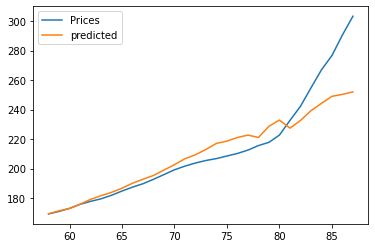

In [38]:
plt.figure(figsize = (15,15))
dff.plot()

In [41]:
feature_importance = pd.DataFrame(data = X.columns, columns= ['Features'])
feature_importance['coeff'] = model.coef_
feature_importance.sort_values('coeff', ascending = False)

,Features,coeff
1,GDPC1,28.932776
6,Homes_Sold,16.952996
2,Wage,8.223555
4,UNRATE,6.893515
3,DFF,-0.075275
5,new,-2.856320
0,DelinquencyRate,-4.802943


<AxesSubplot:xlabel='Features', ylabel='coeff'>

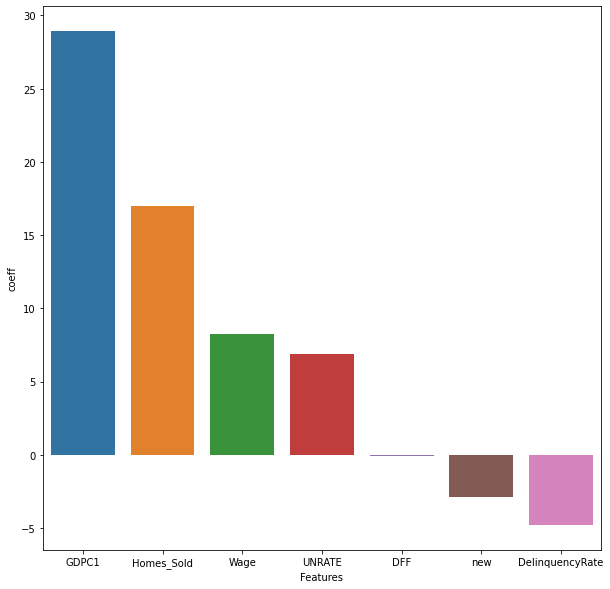

In [49]:
plt.figure(figsize=(10,10))
sns.barplot(x='Features',
            y="coeff", data=feature_importance,
            order=feature_importance.sort_values('coeff', ascending = False).Features)

### * Moving on to the Modeling part. Standardizing the data was the first step needed as our data was unevenly distriburted.
### * As our y variable was continuous in nature Linear Regression was most suited for this task.
### * After modelling our data the Training and Test Accuracy achieved was 98% and 81% respectectively.
### * After the whole evaluation of this case we can consider that GDP, Houses Sold and Wages are the most important factors Affecting the House Prices in the US.